In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TODO

* Cambiar os valores de A para que tamen teñas negativos
* Nos quedamos con 2, 8, 16, 32, 256
* Tenemos que hacer lo de los ints
* Y cambiar el acceso a memoria


In [301]:
def leer_csv(filename: str) -> pd.DataFrame:
    pd.set_option('display.max_rows', None)
    df_temp = pd.read_csv(filename, header=0)
    df_temp.columns = ['N', 'ck']
    
    lista_N = list(df_temp['N'].unique())
    lista_N.sort()
    ck_values = [df_temp.loc[df_temp['N'] == n]['ck'].median() for n in lista_N]

    df = pd.DataFrame(list(zip(lista_N, ck_values)))
    df.columns = ['N', 'ck']
    df.sort_values(by=['N'])

    return df

In [3]:

def avg_of_best(df: pd.DataFrame) -> pd.DataFrame:

    data = []
    for d in df['D'].unique():
        for l in df['L'].unique():
            # Media geométrica de los 3 accesos más rapidos 
            ck_avg = df.loc[(df['D'] == d) & (df['L'] == l)] \
            	.nsmallest(3, 'Ck_per_Access')['Ck_per_Access'] \
            	.prod()**(1/3)
            data.append([d, l, ck_avg])
            
    return pd.DataFrame(data, columns=['D', 'L', 'Ck'])

In [4]:
# Saves all graphs
def graph_data(df: pd.DataFrame, type_of_graph: str) -> None:
    d = max(df['N'].unique())
    for d in df['N'].unique():
        fig, ax = plt.subplots()
        
        l_values = [str(i) for i in df.loc[df['D']==d]['L'].values]
        ck_values = list(df.loc[df['D']==d]['Ck'].values)
        
        ax.bar(l_values, ck_values) # Crea la grafica
        ax.set_ylabel('Ciclos de reloj por acceso')
        ax.set_title(f'Valor de D: {d}')
        
        # Guarda las graficas
        plt.savefig(f'data/{type_of_graph}/graphs/graph_{type_of_graph}{d}.png')

# Crear Gráficas Básicas

In [302]:
v1_0 = leer_csv('results/results/version1_o0.csv')
v1_2 = leer_csv('results/results/version1_o2.csv')
v1_3 = leer_csv('results/results/version1_o3.csv')
v2_0 = leer_csv('results/results/version2_o0.csv')
v3_0 = leer_csv('results/results/version3_o0.csv')
v4_0 = leer_csv('results/results/version4_o0.csv')
v4_0_dynamic = leer_csv('results/results/version4_o0_dynamic.csv')
v4_0_guided = leer_csv('results/results/version4_o0_guided.csv')
v4_0_collapse = leer_csv('results/results/version4_o0_collapse.csv')
v4_2 = leer_csv('results/results/version4_o2.csv')
list_of_N = list(v1_0['N'].values)


In [101]:
def graph_hilos(list_of_df: list[pd.DataFrame]) -> None:
    lista_num_hilos = [4, 8, 16, 32, 64]
    n = max(list_of_df[0]['N'].unique())
    x = np.arange(len(lista_num_hilos))
    
    ck_values = [list(d.loc[d['N']==n]['ck'].values)[0] for d in list_of_df]
    print(ck_values)
    
    ## ESTETICA
    # the width of the bars
    width = 0.2

    # Para la separación entre barras del mismo grupo
    multiplier = 0
    ck_max = max(ck_values)
    fig, ax = plt.subplots()
    
    offset = width * multiplier

    ax.set_title('Ciclos de acceso para distinto numero de hilos usando OpenMP')
    rects = ax.bar(x + offset, ck_values, width, label=f"Hilos: {3}")
    
    # Etiquetas encima de las barras
    ax.bar_label(rects, padding=5, fmt="%.2f", rotation=75, fontsize=6)


    y_index = np.arange(0.0, ck_max, 10000000)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Ciclos de reloj (10e8)')
    ax.set_yticks(y_index, )
    ax.set_xticks(x + width, lista_num_hilos)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, ck_max+20000)
    
    

[156874908.0, 80066463.0, 42930572.0, 24491173.0, 16929901.0]


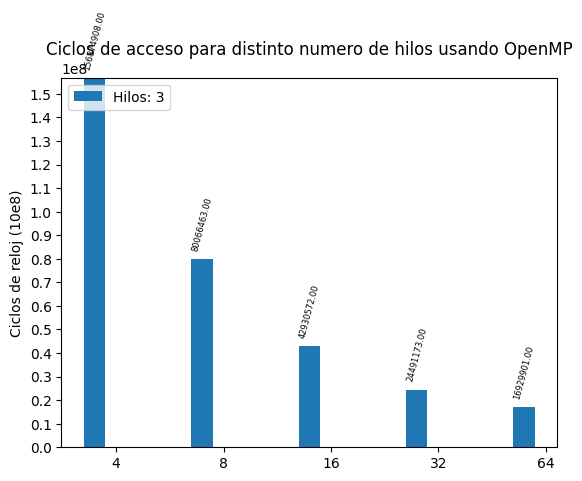

In [180]:
graph_hilos(list_hilos)

In [300]:
l = [4, 3, 4, 5, 6, 7, 7]
l.sort()
print(l)

[3, 4, 4, 5, 6, 7, 7]


In [303]:
# HILOS
v4_h4 = leer_csv('results/hilos/v4_h4.csv')
v4_h8 = leer_csv('results/hilos/v4_h8.csv')
v4_h16 = leer_csv('results/hilos/v4_h16.csv')
v4_h32 = leer_csv('results/hilos/v4_h32.csv')
v4_h64 = leer_csv('results/hilos/v4_h64.csv')

In [305]:
v4_h4

,N,ck
0,250,1434792.0
1,500,5018275.0
2,750,10595547.0
3,1000,17848899.0
4,1500,39307740.0
5,2000,69979438.0
6,2550,113298412.0
7,3000,156874908.0


In [288]:
v4_h4['N'][7] < v4_h4['N'][0]

True

In [306]:
h4 = speed_up(v1_0, v4_h4)
h8 = speed_up(v1_0, v4_h8)
h16 = speed_up(v1_0, v4_h16)
h32 = speed_up(v1_0, v4_h32)
h64 = speed_up(v1_0, v4_h64)

In [307]:
for i in h4:
	print(i)
print()

for i in h8:
	print(i)
print()

for i in h16:
	print(i)
print()

for i in h32:
	print(i)
print()

for i in h64:
	print(i)
print()

4.262270071201958
4.943938903308408
5.178642499533058
5.3865856936049665
5.470868943368405
5.43134756240826
5.465626376122553
5.42442275089653

5.810456876713786
8.199025107609945
8.974903562053958
9.66453338099359
10.37305990648171
10.368366043325109
10.608534911674516
10.628118042381864

5.5941622118062035
11.110782948270689
14.33422040726333
15.146185641652874
18.20064290785763
18.933588788213434
19.84838190375897
19.8216744002386

3.732796885567305
10.54888320651453
14.816295439424183
20.97549100992328
26.695165096096265
30.63373047776213
33.01331649738758
34.74540888670379

1.9281159769387974
7.190489963908501
12.47016292864761
18.661908826965025
29.99598198406798
38.408919966850206
49.35995048754812
50.26348470673278



In [178]:
## PARA CADA VALOR DE N
## DISTINTOS HILOS
## N, numHilos -> (4, 8...) datos ck
print("N", end=" ")
for n in [4, 8, 16, 32, 64]:
    print(n, end="\t")
print("")

for n in list_of_N:
    for d in list_hilos:
        print(d.loc[d['N']==n]['ck'].values[0])
    print("")



N 4	8	16	32	64	
1434792.0
1052494.0
1093188.0
1638308.0
3171734.0

5018275.0
3025975.0
2232970.0
2351912.0
3450397.0

10595547.0
6113776.0
3827941.0
3703392.0
4400147.0

17848899.0
9948191.0
6347778.0
4583665.0
5151918.0

39307740.0
20731346.0
11815379.0
8055672.0
7169210.0

69979438.0
36657912.0
20074517.0
12407325.0
9895687.0

113298412.0
58372508.0
31198855.0
18757485.0
12545531.0

156874908.0
80066463.0
42930572.0
24491173.0
16929901.0



# Crear Gráficas Agrupadas
* Grupos en función de la L para cada tipo de gráfica
* Gráficas para comparar distintos tipos

## Formato de los datos a darle a las gráficas
{

	Valores de N, numero de cilos
    
}

In [242]:
def graph_four(d1, d2, d3, d4, v1: str, v2: str, v3: str, v4: str)-> None:

    # the label locations
    x = np.arange(len(d1['N'].unique()))
    pos_int = np.arange(0.0, len(d1['N'].unique())*2, 2)

    ## ESTETICA
    # the width of the bars
    width = 0.25

    # Para la separación entre barras del mismo grupo
    multiplier = 0
    ## FIN ESTETICA

    # Crear las gráficas (ni idea del layout)
    fig, ax = plt.subplots(layout='constrained')

    ck_max = 0;

    ### Grafica 1
    for d, v in zip([[d1, d2], [d3, d4]], [[v1, v2], [v3, v4]]):
        # Tupla de ck
        da, db = d
        va, vb = v
        
        #####
        # Tupla de ck
        ck1_values = tuple(da['ck'].values)
        ck2_values = tuple(db['ck'].values)

        if max(ck1_values) > ck_max:
            ck_max = max(ck1_values)

        if max(ck2_values) > ck_max:
            ck_max = max(ck2_values)

        # Separación entre barras del mismo grupo
        offset = width * multiplier        

        # Barras
        # Esta o importante

        rects1 = ax.bar(pos_int + offset, ck1_values, width, label=f"{va}")

        rects2 = ax.bar(pos_int + offset + width + 0.09, ck2_values, width, label=f"{vb}")

        # Etiquetas encima de las barras
        #ax.bar_label(rects1, padding=5, fmt="%.2f", fontsize=6, rotation=90)
        #ax.bar_label(rects2, padding=5, fmt="%.4f", fontsize=6, rotation=90)

        # Offset de cada tupla
        multiplier += 2.6
        
        #####

    # Etiquetas encima de las barras
    #ax.bar_label(rects, padding=3, fmt="%.1E", fontsize=6)


    ### FINISHED CREATING GRAPHS
    y_index = np.arange(0.0, ck_max, 100000000)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title('Comparativa Ciclos de Reloj con v1 Optimizada con -O3')
    ax.set_ylabel('Ciclos de reloj (10e8)')
    ax.set_yticks(y_index, )
    ax.set_xticks(pos_int + 0.5 + width/2, tuple(d1['N'].values))
    ax.legend(loc='upper left', ncols=3)
    #plt.show()

    plt.savefig(f'results/graphs/graph_final.png')

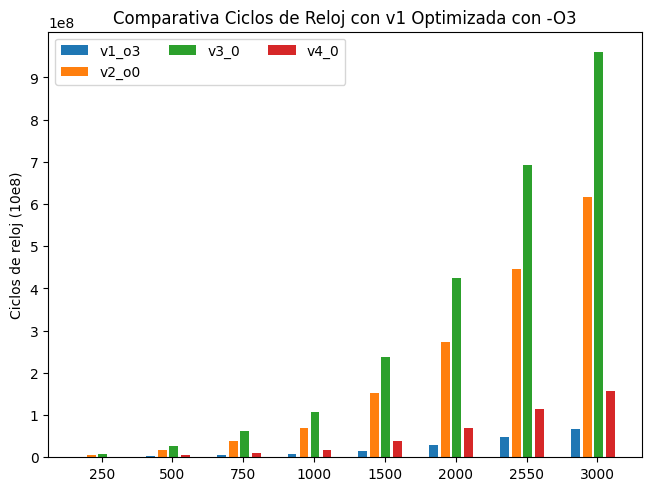

In [243]:
graph_four(v1_3, v2_0, v3_0, v4_0, "v1_o3", "v2_o0", "v3_0", "v4_0")

In [250]:
def graph_three(d1, d2, d3, v1: str, v2: str, v3: str, title: str)-> None:

    # the label locations
    x = np.arange(len(d1['N'].unique()))

    ## ESTETICA
    # the width of the bars
    width = 0.2

    # Para la separación entre barras del mismo grupo
    multiplier = 0
    ## FIN ESTETICA

    # Crear las gráficas (ni idea del layout)
    fig, ax = plt.subplots(layout='constrained')

    ck_max = 0;

    ### Grafica 1
    for d, v in zip([d1, d2, d3], [v1, v2, v3]):
        # Tupla de ck
        ck_values = tuple(d['ck'].values)

        if max(ck_values) > ck_max:
            ck_max = max(ck_values)

        # Separación entre barras del mismo grupo
        offset = width * multiplier

        # Barras
        # Esta o importante
        rects = ax.bar(x + offset, ck_values, width, label=f"{v}")

        # Etiquetas encima de las barras
        #ax.bar_label(rects, padding=3, fmt="%.1E", fontsize=6)

        # Offset de cada tupla
        multiplier += 1.25

    # Etiquetas encima de las barras
    #ax.bar_label(rects, padding=3, fmt="%.1E", fontsize=6)


    ### FINISHED CREATING GRAPHS
    y_index = np.arange(0.0, ck_max, 100000000)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(title)
    ax.set_ylabel('Ciclos de reloj (10e8)')
    ax.set_yticks(y_index, )
    ax.set_xticks(x + width, tuple(d1['N'].values))
    ax.legend(loc='upper left', ncols=3)
    #plt.show()

    plt.savefig(f'results/graphs/graph_{v1}_{v2}_{v3}.png')

In [245]:
def graph_two (d1: pd.DataFrame, d2: pd.DataFrame, v1: str, v2: str) -> None:

    # the label locations
    x = np.arange(len(d1['N'].unique()))

    ## ESTETICA
    # the width of the bars
    width = 0.3

    # Para la separación entre barras del mismo grupo
    multiplier = 0
    ## FIN ESTETICA

    # Crear las gráficas (ni idea del layout)
    fig, ax = plt.subplots(layout='constrained')

    ck_max = 0;

    ### Grafica 1
    for d, v in zip([d1, d2], [v1, v2]):
        # Tupla de ck
        ck_values = tuple(d['ck'].values)

        if max(ck_values) > ck_max:
            ck_max = max(ck_values)

        # Separación entre barras del mismo grupo
        offset = width * multiplier

        # Barras
        # Esta o importante
        rects = ax.bar(x + offset, ck_values, width, label=f"Version: {v}")

        # Etiquetas encima de las barras
        #ax.bar_label(rects, padding=3, fmt="%.1E", fontsize=6)

        # Offset de cada tupla
        multiplier += 1.25

    # Etiquetas encima de las barras
    #ax.bar_label(rects, padding=3, fmt="%.1E", fontsize=6)


    ### FINISHED CREATING GRAPHS
    y_index = np.arange(0.0, ck_max, 100000000)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(f"Comparativa Ciclos de Reloj: {v1} - {v2}")
    ax.set_ylabel('Ciclos de reloj (10e8)')
    ax.set_yticks(y_index, )
    ax.set_xticks(x + width, tuple(d1['N'].values))
    ax.legend(loc='upper left', ncols=3)
    #plt.show()

    plt.savefig(f'results/graphs/graph_{v1}_{v2}.png')

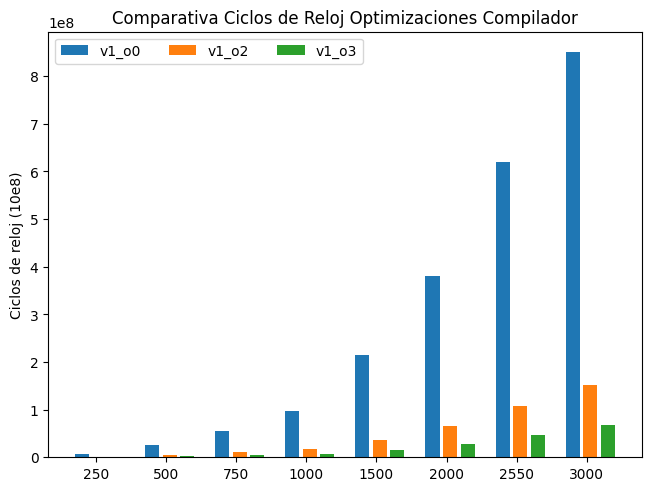

In [252]:
graph_three(v1_0, v1_2, v1_3, "v1_o0", "v1_o2", "v1_o3", "Comparativa Ciclos de Reloj Optimizaciones Compilador")

In [255]:
def speed_up(d1, d2) -> list:
    ck1 = d1['ck']
    ck2 = d2['ck']
    return [c1/c2 for c1, c2 in zip(ck1, ck2)]

In [308]:
# Static Guided Dynamic 

s6 = speed_up(v1_0, v4_0)
s7 = speed_up(v1_0, v4_0_dynamic)
s8 = speed_up(v1_0, v4_0_guided)
s9 = speed_up(v1_0, v4_0_collapse)



In [309]:
for i in s6:
	print(i)
print()

for i in s7:
	print(i)
print()

for i in s8:
	print(i)
print()

for i in s9:
	print(i)
print()

4.253983237188428
4.968199376423023
5.283618261010822
5.414855409362867
5.4796372853185975
5.430131243591249
5.456169877701334
5.425662586858146

4.234193446541107
4.9422813896052515
5.247731170426467
5.305908905556881
5.402943672581768
5.416647029652928
5.470067911432971
5.420840553692378

4.317746867491741
4.9632547769490145
5.267353172442122
5.392619757767812
5.4335593523283485
5.418425775240909
5.47366848180377
5.423614610237641

4.303720760352237
4.942571841974252
5.199375133666758
5.404679314267212
5.441338536803094
5.448503166504668
5.4577136401904855
5.421752672223413



In [262]:
s1 = speed_up(v1_0, v2_0)
s2 = speed_up(v2_0, v3_0)
s3 = speed_up(v2_0, v4_0)
s4 = speed_up(v1_0, v1_3)
s5 = speed_up(v1_0, v1_2)

for i in s1:
	print(i)

print()

for i in s2:
    print(i)
    
print()
for i in s3:
    print(i)
    
print()
for i in s4:
    print(i)
    
print()
for i in s5:
    print(i)

1.3611226538578902
1.3869579343856604
1.4018729314948841
1.40661280459954
1.4018658938402728
1.3890517522764951
1.3905536792645674
1.379174731698865

0.6508327849323008
0.6524949472783587
0.6388582311532891
0.6430375949913798
0.6447269628276368
0.6429660939093548
0.6420210216244027
0.6423221645912955

3.1253489354035615
3.5820836762606207
3.7689708833857343
3.8495706790501356
3.9088170340657005
3.90923609195402
3.923739125689113
3.9339921636867756

9.724229992526515
9.20576232924288
11.424669251124289
13.67482005547608
13.81208511477909
13.217164765443211
13.004821248776349
12.660049069684305

4.971289053926406
4.879258723748712
5.419186731135281
5.789648240685552
5.944997749278623
5.7584465768419095
5.7008708508584425
5.629090352563205


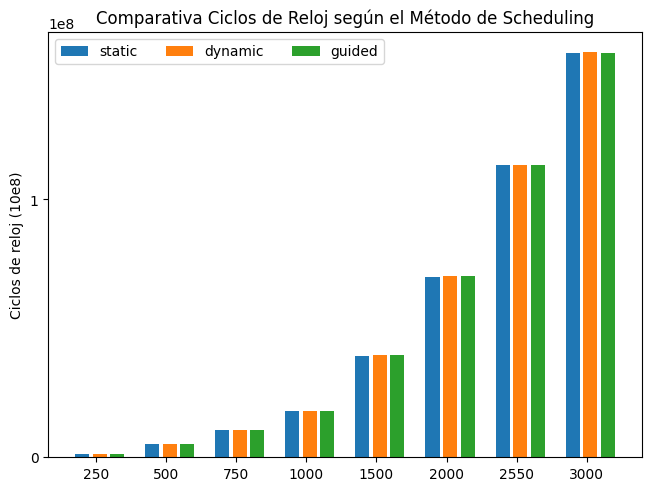

In [251]:
graph_three(v4_0, v4_0_dynamic, v4_0_guided, "static", "dynamic", "guided", "Comparativa Ciclos de Reloj según el Método de Scheduling")

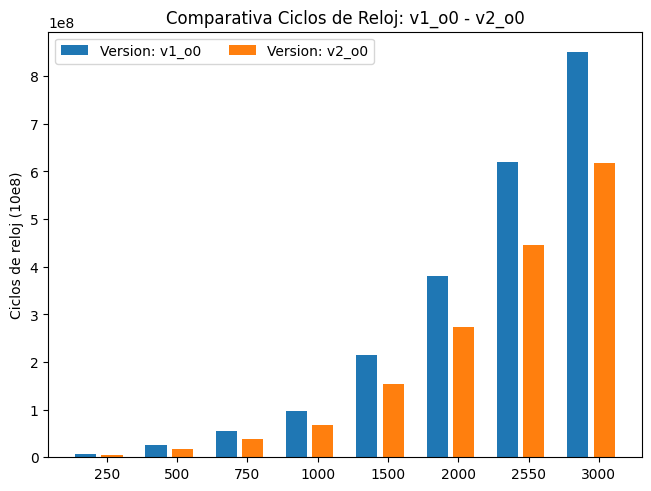

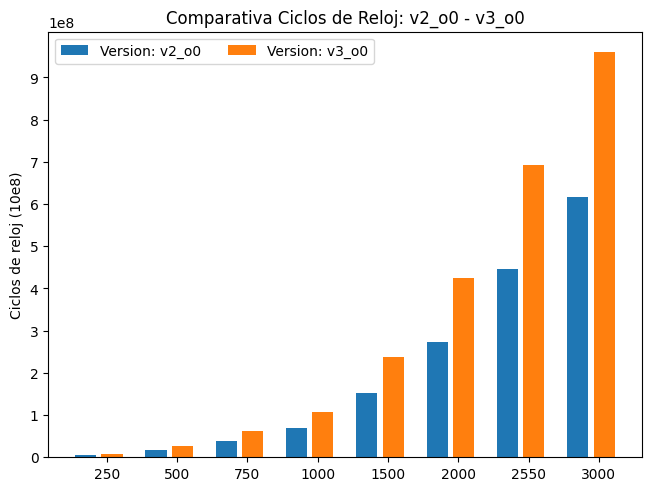

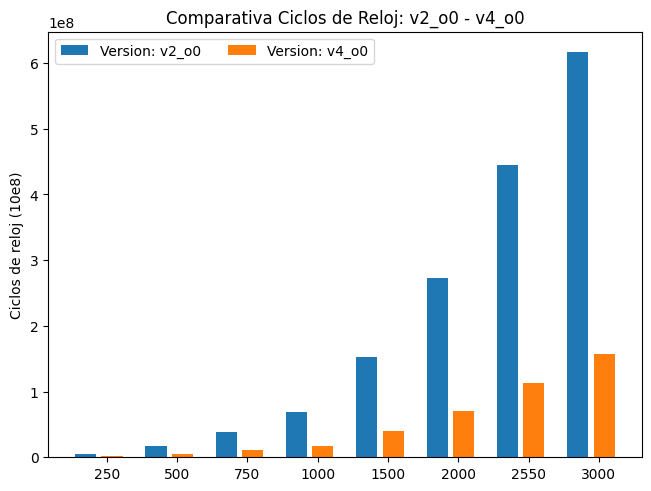

In [247]:
graph_two(v1_0, v2_0, "v1_o0", "v2_o0")
graph_two(v2_0, v3_0, "v2_o0", "v3_o0")
graph_two(v2_0, v4_0, "v2_o0", "v4_o0")

## Grafear 2

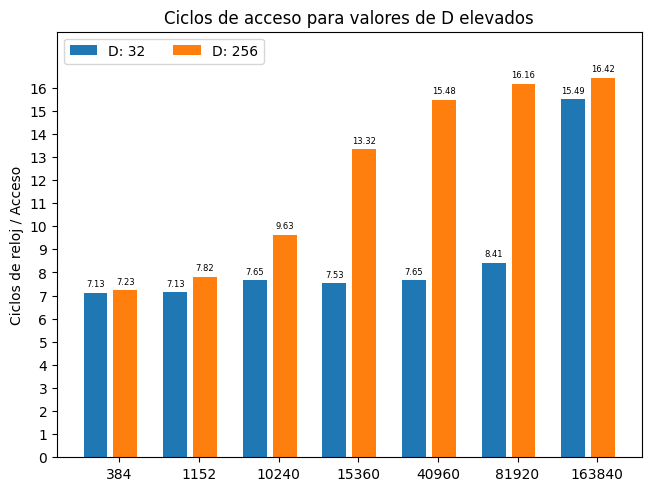

In [265]:
# the label locations
x = np.arange(len(l_values))

# the width of the bars
width = 0.3

# Para la separación entre barras del mismo grupo
multiplier = 0

# Crear las gráficas (ni idea del layout)
fig, ax = plt.subplots(layout='constrained')

ck_max = 0;
for d in d_values_big:
    
    # Tupla de ck
    ck_values = tuple(df.loc[df['D']==d]['Ck'].values)
    
    if max(ck_values) > ck_max:
        ck_max = max(ck_values)
    
    # Separación entre barras del mismo grupo
    offset = width * multiplier
    
    # Barras
    # Esta o importante
    rects = ax.bar(x + offset, ck_values, width, label=f"D: {d}")
    
    # Etiquetas encima de las barras
    ax.bar_label(rects, padding=3, fmt="%.2f", fontsize=6)
    
    # Offset de cada tupla
    multiplier += 1.25

y_index = np.arange(0.0, ck_max, 1)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Ciclos de acceso para valores de D elevados')
ax.set_ylabel('Ciclos de reloj / Acceso')
ax.set_yticks(y_index, )
ax.set_xticks(x + width, l_values)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, ck_max+2)

#plt.show()
plt.savefig(f'data/double/graphs/graph_double_bigD.png')

# Crear Gráficas Comparativas

* Cogemos 2 D (8, 16)
* Representar: D1Double, D1Int, D2Double, D2Int para cada L

In [289]:

def graph_comparison(df1: pd.DataFrame, df2: pd.DataFrame, tp1: str, tp2: str) -> None:
    
    l_values = tuple(df1['L'].unique())
    d_values_comp = tuple(df1['D'].unique())[3:]
    
    # the label locations
    x = np.arange(len(l_values)*2) # porque tenemos dos graficas
    print(x)

    pos_double = np.arange(1.0, len(l_values)*2, 2)
    pos_int = np.arange(0.0, len(l_values)*2, 2)

    # the width of the bars
    width = 0.25

    # Para la separación entre barras del mismo grupo
    multiplier = 0

    # Crear las gráficas (ni idea del layout)
    fig, ax = plt.subplots(layout='constrained')

    ck_max = 0;
    for d in d_values_comp:

        # Tupla de ck
        ck1_values = tuple(df1.loc[df['D']==d]['Ck'].values)
        ck2_values = tuple(df2.loc[df['D']==d]['Ck'].values)

        if max(ck1_values) > ck_max:
            ck_max = max(ck1_values)

        if max(ck2_values) > ck_max:
            ck_max = max(ck2_values)

        # Separación entre barras del mismo grupo
        offset = width * multiplier        

        # Barras
        # Esta o importante

        rects1 = ax.bar(pos_int + offset, ck1_values, width, label=f"{tp1} D: {d}")

        rects2 = ax.bar(pos_int + offset + width + 0.09, ck2_values, width, label=f"{tp2} D: {d}")

        # Etiquetas encima de las barras
        ax.bar_label(rects1, padding=5, fmt="%.2f", fontsize=6, rotation=90)
        ax.bar_label(rects2, padding=5, fmt="%.4f", fontsize=6, rotation=90)

        # Offset de cada tupla
        multiplier += 2.6

    y_index = np.arange(0.0, ck_max, 1)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(f'Comparativa entre {tp1} y {tp2}')
    ax.set_ylabel('Ciclos de reloj / Acceso')
    ax.set_yticks(y_index, )
    ax.set_xticks(pos_int + 0.5 + width/2, l_values)
    ax.legend(loc='upper left', ncols=2)
    ax.set_ylim(0, ck_max+2)

    plt.show()
    #plt.savefig(f'data/{tp1}/graphs/graph_compare_{tp1}_{tp2}.png')
    #plt.savefig(f'data/double/graphs/graph_compare_index_no_index.png')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


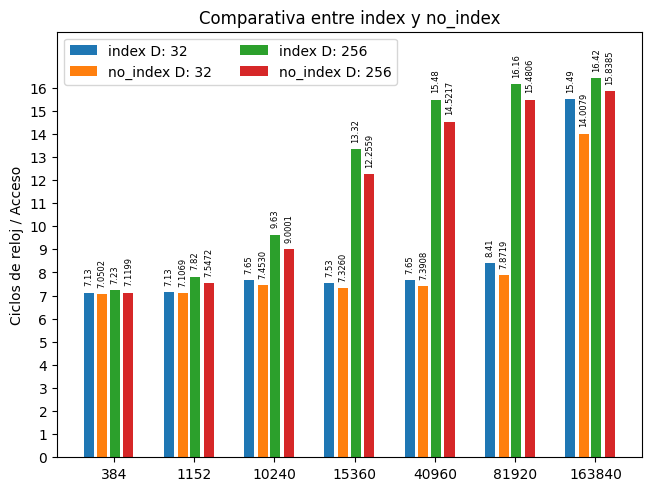

In [290]:
df_double = avg_of_best(leer_csv('data/double/ck_double.csv'))

df_int = avg_of_best(leer_csv('data/int/ck_int.csv'))

df_no_index = avg_of_best(leer_csv('data/no_index/ck_no_index.csv'))

graph_comparison(df_double, df_no_index, "index", "no_index")
#graph_comparison(df_double, df_int, "double", "int")